# **Part 2.B Solutions Notebook** 

In [5]:
from IPython.display import Image,display,HTML
import cv2
import scipy.stats as stats
import statistics
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import linear_model

### Reading operations of the image

In [6]:
image = cv2.imread('image9.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

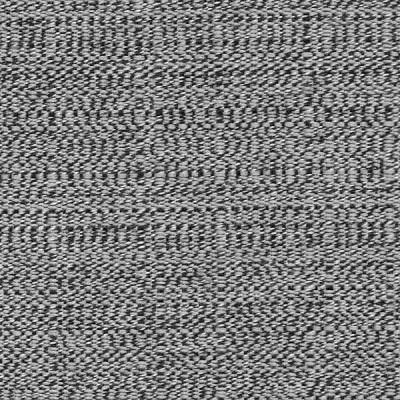

In [7]:
cv2.imwrite('image9_gray.jpg', gray) 
Image(filename='image9_gray.jpg')

### Splitting image into 51x51 patches

We are shifting windows of size 51x51 "4" pixels everytime starting from the top left corner of the image to get our training data for building the linear regression model.

In [36]:
starting_x=0 #initialization of starting x coordinate
starting_y=0 #initialization of starting y coordinate
patch_number=87*87
number_of_predictors=(51*51)-1
y=np.arange(patch_number)
x=np.zeros((patch_number,number_of_predictors))
for i in range(patch_number): #repeating the process for total number of patches(last 1 pixel isn't considered at each dimension)
    gray_patch=gray[starting_x:(starting_x+51),starting_y:(starting_y+51)]   #selecting the patch
    y[i]=gray_patch[25,25]                                                   #selecting the central pixel
    x[i]=np.array(np.delete(gray_patch,1300))                                #finding predictors
    starting_x=starting_x+4 
    if starting_x==348:
        starting_y=starting_y+4
        starting_x=0
        if starting_y==348:
            break

We are shifting windows of 51x51 "1" pixels everytime starting from the top left corner of the image to get the necessary input to predict the center pixels with the constructed linear regression model. 

In [37]:
starting_x=0 #initialization of starting x coordinate
starting_y=0 #initialization of starting y coordinate
patch_number=350*350
number_of_predictors=(51*51)-1
y_pred=np.arange(patch_number)
x_pred=np.zeros((patch_number,number_of_predictors))
for i in range(patch_number): #repeating the process for total number of patches(last 2 pixels isn't considered)
    gray_patch=gray[starting_x:(starting_x+51),starting_y:(starting_y+51)] #selecting the patch
    y_pred[i]=gray_patch[25,25]
    x_pred[i]=np.array(np.delete(gray_patch,1300))
    starting_x=starting_x+1
    if starting_x==350:
        starting_y=starting_y+1
        starting_x=0
        if starting_y==350:
            break

### Building the linear regression model

In [40]:
lm=linear_model.LinearRegression()
model =lm.fit(x,y)
predictions=lm.predict(x_pred)

[205.28144746 148.79343065  72.96392223  63.71877923  54.71754136]
[205 157  62  57  47]


### Plotting the residuals

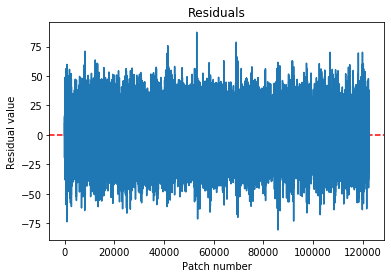

In [47]:
residuals=y_pred-predictions
plt.figure()
plt.title('Residuals')
plt.axhline(0, color='r', linestyle='--')
plt.plot(residuals)
plt.xlabel('Patch number')
plt.ylabel('Residual value')
plt.show()

### Plotting the Q-Q plot of the residuals

With the below code we are plotting Q-Q plot of residuals for normal distribution. We can clearly see that observed values and theoretical quantiles are highly close which leads the conclusion that residuals are approximately normally distributed.

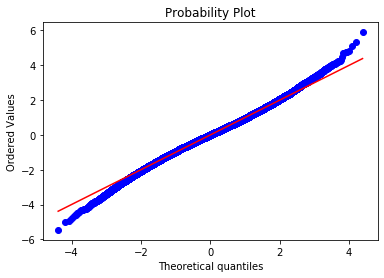

In [42]:
residual_mean=np.mean(residuals)
residual_std=np.std(residuals)
residual_normalized=(residuals-residual_mean)/(residual_std)

stats.probplot(residual_normalized, dist="norm", plot=plt)
plt.show()

### X-bar chart of the residuals

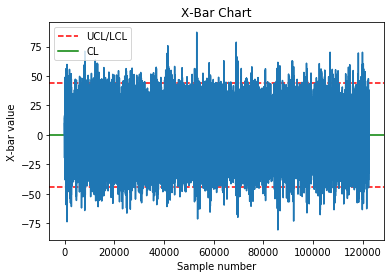

In [44]:
residual_mean=np.mean(residuals)
residual_std=np.std(residuals)
upper_limit=residual_mean+3*residual_std
lower_limit=residual_mean-3*residual_std
central_line=residual_mean

plt.figure()
plt.title('X-Bar Chart')
plt.xlabel('Sample number')
plt.ylabel('X-bar value')
plt.axhline(upper_limit,color="r", linestyle='--', label='UCL/LCL')
plt.axhline(lower_limit,color="r", linestyle='--')
plt.axhline(central_line,color="g", label='CL')
plt.plot(residuals)
plt.legend()
plt.show()

### Updating the image by setting the outlier values to 0 (black pixel)

In [62]:
gray_updated=np.copy(gray)
outliers=np.where((residuals>upper_limit)|(residuals<lower_limit))
for i in outliers[0]: #replacing the outliers with 0
    gray_updated[25+(i%350),25+int(i/350)]=0
print("Number of Outlier Pixels={}".format(len(outliers[0])))

Number of Outlier Pixels=766


The process captures center pixels that are most different than their surrounding pixels (outliers) in each patch and replaces them with a black pixel, since the process didn't find significant number of outliers (766 at total) the modified image (upper image) and the original greyscale image looks very much alike.
However, we are also assuming that predictors which are the surrounding pixels in each patch are independent from each other when we build our multiple linear regression model which is not a very accurate assumption. Therefore we are able to get unrealistically good predictions for center pixels and reach very low number of outliers in x-bar control chart for residuals.
ALTERNATİF YOLLAR ÖNER

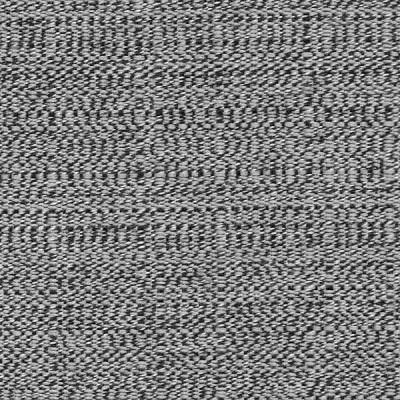

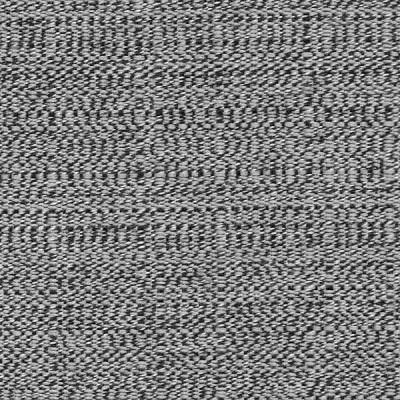

In [60]:
cv2.imwrite('image9_gray_updated.jpg', gray) 
display(Image(filename='image9_gray_updated.jpg'),Image(filename='image9_gray.jpg'))

> **NOTE:** The source code is available at [here.](https://github.com/BU-IE-582/fall19-akinelden/blob/master/Project_Part2/Part2_B.ipynb)